In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Gym_data.csv')

In [3]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [5]:
df.shape

(62184, 11)

In [6]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


In [7]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
X.columns

Index(['date', 'timestamp', 'day_of_week', 'is_weekend', 'is_holiday',
       'temperature', 'is_start_of_semester', 'is_during_semester', 'month',
       'hour'],
      dtype='object')

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 10 columns):
date                    62184 non-null object
timestamp               62184 non-null int64
day_of_week             62184 non-null int64
is_weekend              62184 non-null int64
is_holiday              62184 non-null int64
temperature             62184 non-null float64
is_start_of_semester    62184 non-null int64
is_during_semester      62184 non-null int64
month                   62184 non-null int64
hour                    62184 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 4.7+ MB


In [11]:
X.drop('date', axis=1, inplace=True)

In [12]:
X.columns

Index(['timestamp', 'day_of_week', 'is_weekend', 'is_holiday', 'temperature',
       'is_start_of_semester', 'is_during_semester', 'month', 'hour'],
      dtype='object')

In [13]:
X.head()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,61211,4,0,0,71.76,0,0,8,17
1,62414,4,0,0,71.76,0,0,8,17
2,63015,4,0,0,71.76,0,0,8,17
3,63616,4,0,0,71.76,0,0,8,17
4,64217,4,0,0,71.76,0,0,8,17


In [14]:
X.describe()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
X_train.shape

(49747, 9)

In [17]:
X_test.shape

(12437, 9)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:10]

array([[-0.11096041, -1.49027954, -0.62463067, -0.04978594,  0.12704404,
        -0.29157883, -1.39132752, -0.12980396, -0.18584977],
       [ 1.18476841, -0.98880877, -0.62463067, -0.04978594,  0.34099061,
        -0.29157883,  0.71873803,  0.45123329,  1.15547716],
       [-0.14144085,  1.01707428,  1.60094604, -0.04978594, -1.35790371,
        -0.29157883,  0.71873803,  1.03227053, -0.18584977],
       [ 1.13216173,  0.01413275, -0.62463067, -0.04978594, -0.88246686,
        -0.29157883,  0.71873803,  1.32278916,  1.15547716],
       [ 0.21936152, -0.48733801, -0.62463067, -0.04978594,  0.93845625,
        -0.29157883,  0.71873803, -1.29187845,  0.26125921],
       [ 0.53677992, -0.98880877, -0.62463067, -0.04978594,  1.41547788,
        -0.29157883,  0.71873803,  0.74175191,  0.55933186],
       [-0.18246744,  1.01707428,  1.60094604, -0.04978594,  1.39962999,
        -0.29157883,  0.71873803,  0.74175191, -0.18584977],
       [-1.05142876,  1.01707428,  1.60094604, -0.04978594,  1

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)
pca.transform(X_test)

array([[ 1.28180067, -2.26319967,  0.80469975, ...,  0.35382008,
        -0.0190079 ,  0.03821984],
       [ 0.66188972,  1.10152435, -0.40198247, ..., -0.08993166,
        -0.29065688, -0.0501725 ],
       [ 1.62904555, -2.2763339 ,  0.88319936, ...,  0.64496244,
        -0.0286978 ,  0.05114496],
       ...,
       [ 0.20156176, -1.89998658,  0.83930268, ...,  0.54419478,
        -0.36850231,  0.04296803],
       [ 2.47030286, -2.30993513,  0.45312851, ...,  0.44975905,
        -0.01766605,  0.05272306],
       [ 0.89216068, -2.24408752,  1.1111132 , ...,  0.52963848,
        -0.02910931, -0.02594016]])

In [20]:
pca.get_covariance()

array([[ 1.00002010e+00,  3.75131003e-05,  2.50350014e-03,
        -1.01349617e-03,  1.83831634e-01,  1.01732287e-02,
         4.28455475e-02, -2.69534441e-02,  9.99097612e-01],
       [ 3.75131003e-05,  1.00002010e+00,  7.90964006e-01,
        -7.41964524e-02,  1.17433976e-02, -9.83351458e-03,
        -4.77644333e-03,  1.58244904e-02, -1.04704061e-04],
       [ 2.50350014e-03,  7.90964006e-01,  1.00002010e+00,
        -3.10984474e-02,  2.06121083e-02, -1.46525560e-02,
        -3.33440358e-02,  8.90023022e-03,  2.39536188e-03],
       [-1.01349617e-03, -7.41964524e-02, -3.10984474e-02,
         1.00002010e+00, -8.68842082e-02, -1.45168164e-02,
        -6.92699346e-02, -9.32467342e-02, -1.10892007e-03],
       [ 1.83831634e-01,  1.17433976e-02,  2.06121083e-02,
        -8.68842082e-02,  1.00002010e+00,  9.25411850e-02,
         1.55084491e-01,  6.30023644e-02,  1.84093136e-01],
       [ 1.01732287e-02, -9.83351458e-03, -1.46525560e-02,
        -1.45168164e-02,  9.25411850e-02,  1.000020

In [21]:
pca.get_covariance().shape

(9, 9)

In [22]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.30657801e-01, 2.00065836e-01, 1.45476442e-01, 1.28550109e-01,
       1.02147448e-01, 9.27375525e-02, 7.72328359e-02, 2.30295462e-02,
       1.02428525e-04])

In [23]:
2.30657801e-01

0.230657801

In [24]:
2.00065836e-01

0.200065836

In [25]:
len(explained_variance)

9

In [26]:
np.sum(explained_variance)

1.0

In [27]:
for i in explained_variance:
    print(i,end=" | ")

0.23065780144214393 | 0.20006583567922856 | 0.1454764423849629 | 0.12855010902767713 | 0.1021474483097445 | 0.09273755249391773 | 0.07723283591338191 | 0.023029546223703155 | 0.00010242852524013458 | 

In [28]:
l = []
for i in explained_variance:
    l.append(i)
l

[0.23065780144214393,
 0.20006583567922856,
 0.1454764423849629,
 0.12855010902767713,
 0.1021474483097445,
 0.09273755249391773,
 0.07723283591338191,
 0.023029546223703155,
 0.00010242852524013458]

In [29]:
sum(l[0:5])

0.8068976368437571

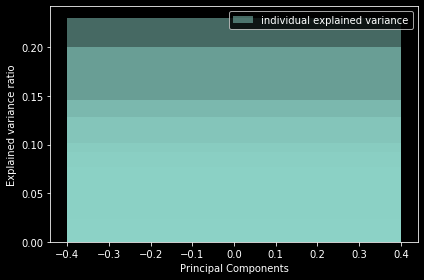

In [30]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,4))
    plt.bar(range(1),explained_variance, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel("Explained variance ratio")
    plt.xlabel("Principal Components")
    plt.legend(loc='best')
    plt.tight_layout();

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

In [32]:
pca.get_covariance()

array([[ 1.21019244, -0.00153097,  0.0029787 ,  0.00742905,  0.22781672,
        -0.00246688,  0.02940777, -0.04010182,  0.77571408],
       [-0.00153097,  1.11308296,  0.67778633, -0.06559249,  0.02577086,
        -0.00857979, -0.01650812,  0.01592388, -0.0016267 ],
       [ 0.0029787 ,  0.67778633,  1.11305402, -0.03795713,  0.01451489,
        -0.01517489, -0.02694499,  0.00882122,  0.00287078],
       [ 0.00742905, -0.06559249, -0.03795713,  0.98798727, -0.14648676,
        -0.00993494, -0.03891709, -0.08546089,  0.00737805],
       [ 0.22781672,  0.02577086,  0.01451489, -0.14648676,  0.69953898,
         0.15113046,  0.27502562,  0.13016133,  0.22808898],
       [-0.00246688, -0.00857979, -0.01517489, -0.00993494,  0.15113046,
         0.88549448,  0.28396375, -0.22989999, -0.00198047],
       [ 0.02940777, -0.01650812, -0.02694499, -0.03891709,  0.27502562,
         0.28396375,  0.85946453,  0.15144821,  0.02986298],
       [-0.04010182,  0.01592388,  0.00882122, -0.08546089,  0

In [33]:
pca.get_covariance().shape

(9, 9)

In [34]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.2306578 , 0.20006584, 0.14547644, 0.12855011, 0.10214745])

In [35]:
l = []
for i in explained_variance:
    l.append(i)
l

[0.2306578014421438,
 0.200065835679228,
 0.14547644238496288,
 0.128550109027677,
 0.10214744830974477]

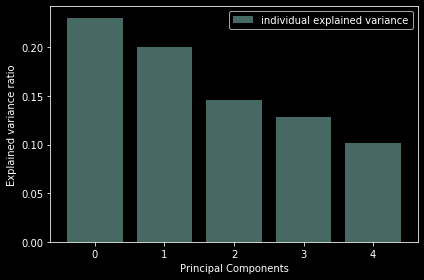

In [36]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,4))
    plt.bar(range(5),explained_variance, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel("Explained variance ratio")
    plt.xlabel("Principal Components")
    plt.legend(loc='best')
    plt.tight_layout();

In [37]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [38]:
regressor = RandomForestRegressor(n_estimators=75, random_state=0)
regressor.fit(X_train_new, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [39]:
y_pred = regressor.predict(X_test_new)
y_pred

array([ 0.12      , 42.22666667,  0.48      , ..., 24.17333333,
        0.22666667, 11.98666667])

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.899160114929222

In [42]:
r2_score(y_test, y_pred)

0.9095124923183369

# Happy Learning